In [213]:
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/Users/cpower/MyCodes/AnalysisTools/')
import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt
mtt=reload(mtt)
st=reload(st)
ht=reload(ht)
gt=reload(gt)
import hmf

In [223]:
#snap=st.SnapshotTools('/Users/cpower/CurrentWork/Trees/HiSURFS_L125_0100','HDF5',convention='SWIFT')
#halo_sub=ht.HaloTools('/Users/cpower/CurrentWork/Trees/HiSURFS_L125fof_subhalo_tab_199.hdf5','SubFind')
halo_vr=ht.HaloTools('/Users/cpower/CurrentWork/Trees/HiSURFS_L125_0100.VELOCIraptor','VELOCIraptor',comoving_units=True,hubble_correction=False)

#gal=gt.GalaxyTools('/Users/cpower/Dropbox/galaxies.hdf5','SHARK')


In [224]:
#snap.ReadSnapshot()
#halo_sub.ReadHaloCatalogue()
halo_vr.ReadHaloCatalogue()

#gal.ReadGalaxyCatalogue()


/Users/cpower/CurrentWork/Trees/HiSURFS_L125_0100.VELOCIraptor.properties
Simulation scale factor: 0.201688
Rescaling by scale factor


In [208]:
125*0.201688

25.211000000000002

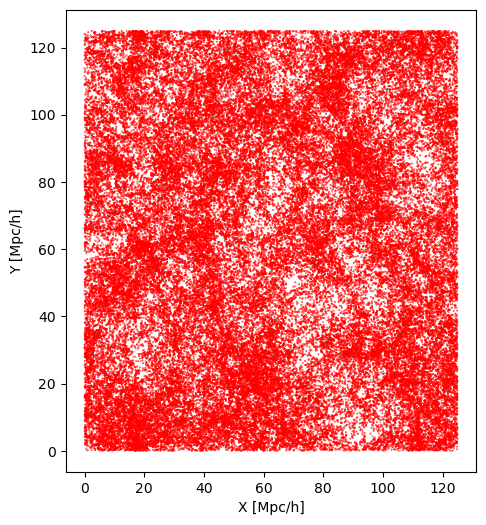

In [225]:
# ipick=np.logical_and(snap.pos[:,2]<125,snap.pos[:,2]>0)
#jpick=np.logical_and(halo_sub.GroupPos[:,2]<125,halo_sub.GroupPos[:,2]>0)
kpick=np.logical_and(halo_vr.GroupPos[:,2]<125,halo_vr.GroupPos[:,2]>0)

#kpick=np.logical_and(gal.pos[:,2]<100,gal.pos[:,2]>0)

fig=plt.figure(figsize=(18,6))
# ax=fig.add_subplot(1,3,1)
# ax.set_xlabel("X [Mpc/h]")
# ax.set_ylabel("Y [Mpc/h]")
# ax.hexbin(snap.pos[ipick][:,0],snap.pos[ipick][:,1],bins='log',gridsize=512,cmap='plasma')

# ax=fig.add_subplot(1,3,2)
# ax.set_xlabel("X [Mpc/h]")
# ax.set_ylabel("Y [Mpc/h]")
# ax.scatter(halo_sub.GroupPos[jpick][:,0],halo_sub.GroupPos[jpick][:,1],s=halo_sub.GroupR200[jpick]/np.max(halo_sub.GroupR200[jpick]),color="red")

ax=fig.add_subplot(1,3,2)
ax.set_xlabel("X [Mpc/h]")
ax.set_ylabel("Y [Mpc/h]")
ax.scatter(halo_vr.GroupPos[kpick][:,0],halo_vr.GroupPos[kpick][:,1],s=halo_vr.GroupR200[kpick]/np.max(halo_vr.GroupR200[kpick]),color="red")

# ax=fig.add_subplot(1,3,3)
# ax.set_xlabel("X [Mpc/h]")
# ax.set_ylabel("Y [Mpc/h]")
# ax.scatter(gal.pos[kpick][:,0],gal.pos[kpick][:,1],s=gal.mstar_tot[kpick]/np.max(gal.mstar_tot[kpick]),color="green")

/var/folders/1x/19fx26p14fq7lf9dgg1p8s840000gq/T/ipykernel_9975/1601600764.py:20: RuntimeWarning: divide by zero encountered in log10
  ldndlm=np.log10(num/snap.BoxSize[0]**3/dlm)


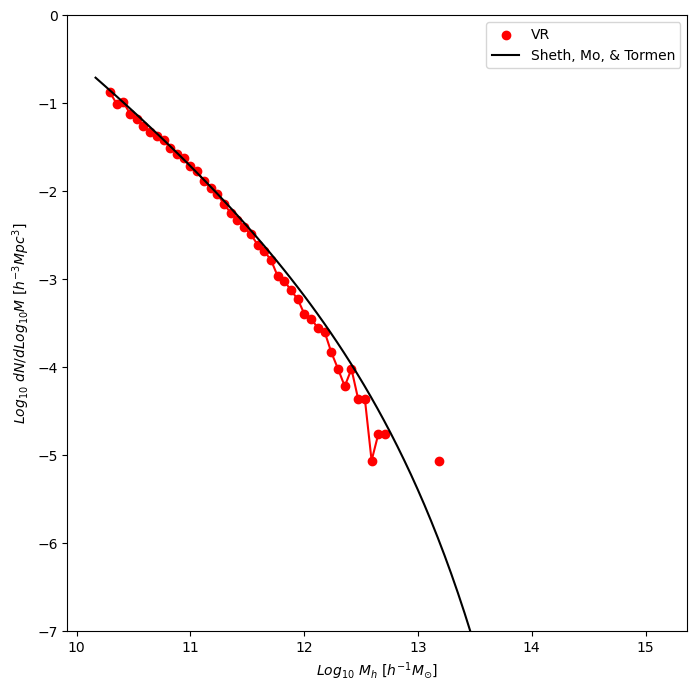

In [226]:
numbins=50

# print(snap.BoxSize[0])
# dlm=(np.max(np.log10(halo_sub.GroupMass))-np.min(np.log10(halo_sub.GroupMass)))/numbins
# (num,lmbins)=np.histogram(np.log10(halo_sub.GroupMass)+10,bins=numbins)
# lm=np.array([])
# for i in range(len(lmbins)-1):
#     lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
# ldndlm=np.log10(num/snap.BoxSize[0]**3/dlm)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
# ax.scatter(lm,ldndlm,label='SubFind')
# ax.plot(lm,ldndlm)

dlm=(np.max(np.log10(halo_vr.GroupMass))-np.min(np.log10(halo_vr.GroupMass)))/numbins
(num,lmbins)=np.histogram(np.log10(halo_vr.GroupMass)+10,bins=numbins)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize[0]**3/dlm)
ax.scatter(lm,ldndlm,color="red",label='VR')
ax.plot(lm,ldndlm,color="red")

ax.set_ylim([-7,0])
ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')
massfunc=hmf.MassFunction(cosmo_params={"Ob0":0.0486,"Om0":0.306078,"H0":68.1},hmf_model='SMT',dlog10m=dlm,z=1/.202-1)
ax.plot(np.log10(massfunc.m/0.681),np.log10(massfunc.dndlog10m*0.681**3),label='Sheth, Mo, & Tormen',color='black')
ax.legend()


/var/folders/1x/19fx26p14fq7lf9dgg1p8s840000gq/T/ipykernel_53619/4162368530.py:30: RuntimeWarning: divide by zero encountered in log10
  ldndlm=np.log10(num/snap.BoxSize**3/dlm)


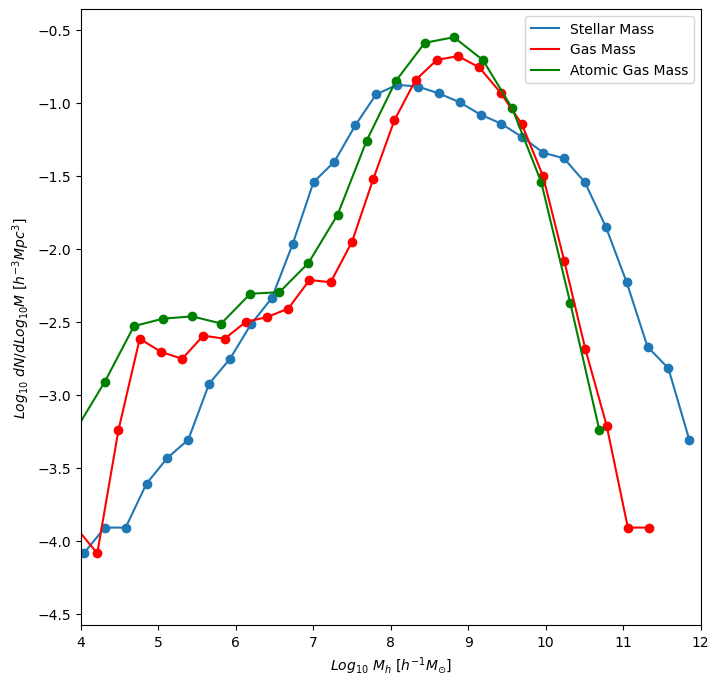

In [20]:

dlm=0.1
numbins=(np.max(np.log10(gal.mstar_tot))-np.min(np.log10(gal.mstar_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.mstar_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlim([4,12])
ax.scatter(lm,ldndlm)
ax.plot(lm,ldndlm,label='Stellar Mass')
ax.set_xlabel(r'$Log_{10}~M_h~[h^{-1} M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~dN/dLog_{10}M~[h^{-3} Mpc^3]$')

numbins=(np.max(np.log10(gal.mgas_tot))-np.min(np.log10(gal.mgas_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.mgas_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
ax.scatter(lm,ldndlm,color='red')
ax.plot(lm,ldndlm,color='red',label='Gas Mass')

numbins=(np.max(np.log10(gal.matom_tot))-np.min(np.log10(gal.matom_tot)))/dlm
(num,lmbins)=np.histogram(np.log10(gal.matom_tot),bins=30)
lm=np.array([])
for i in range(len(lmbins)-1):
    lm=np.append(lm,0.5*(lmbins[i]+lmbins[i+1]))
ldndlm=np.log10(num/snap.BoxSize**3/dlm)
ax.scatter(lm,ldndlm,color='green')
ax.plot(lm,ldndlm,color='green',label='Atomic Gas Mass')

plt.legend()

In [85]:
print(np.max(halo_vr.GroupPos[:,0]))

170.2483385886542


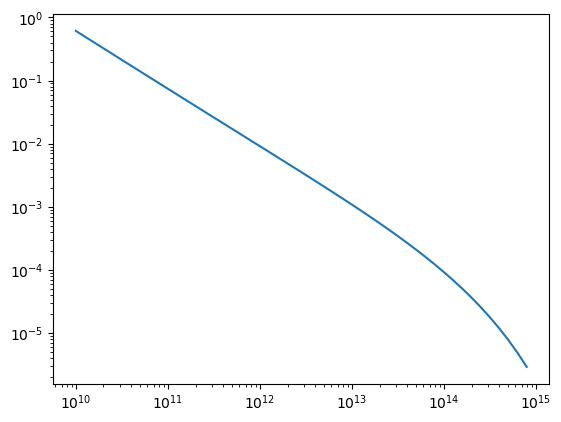

In [175]:
import hmf
?hmf.MassFunction
massfunc=hmf.MassFunction(cosmo_params={"Ob0":0.0486,"Om0":0.306078,"H0":68.1},hmf_model='SMT',dlog10m=0.1)
#massfunc.parameter_values
#massfunc.update(cosmo_params={"Ob0":0.0486,"Om0":0.306078,"H0":68.1})
#massfunc.parameter_values
plt.loglog(massfunc.m,massfunc.dndlog10m)

In [32]:
print(mf)


[2.85061053e-01 2.79011523e-01 2.73068136e-01 2.67223114e-01
 2.61492375e-01 2.55909241e-01 2.50457543e-01 2.45115531e-01
 2.39872617e-01 2.34751911e-01 2.29745327e-01 2.24865164e-01
 2.20117002e-01 2.15484995e-01 2.10925601e-01 2.06445289e-01
 2.02039049e-01 1.97717884e-01 1.93507449e-01 1.89396583e-01
 1.85368522e-01 1.81414407e-01 1.77552266e-01 1.73776024e-01
 1.70094489e-01 1.66512445e-01 1.63018405e-01 1.59579714e-01
 1.56199923e-01 1.52875964e-01 1.49615379e-01 1.46437872e-01
 1.43335855e-01 1.40296373e-01 1.37312137e-01 1.34397141e-01
 1.31546843e-01 1.28767536e-01 1.26063265e-01 1.23425685e-01
 1.20830361e-01 1.18278900e-01 1.15769567e-01 1.13307467e-01
 1.10907714e-01 1.08565238e-01 1.06270009e-01 1.04016108e-01
 1.01814350e-01 9.96613520e-02 9.75616019e-02 9.55184849e-02
 9.35259192e-02 9.15656617e-02 8.96380639e-02 8.77422942e-02
 8.58817372e-02 8.40679873e-02 8.22977274e-02 8.05631783e-02
 7.88595927e-02 7.71952810e-02 7.55677464e-02 7.39801769e-02
 7.24353798e-02 7.092891

In [6]:
96*48

4608

In [9]:
64*3*192


36864

In [14]:
4609*1.033

4761.097